<a href="https://colab.research.google.com/github/harsh-18/ai-ml-ds-portfolio/blob/main/SafeHelmetProjectCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [ ]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import tensorflow as tf
# Check for GPU availability and TensorFlow version
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.19.0


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                 # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential, Model                                            # Importing the sequential module to define a sequential model and Model for functional API
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization, Input, GlobalAveragePooling2D # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16                                                       # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                             # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [ ]:
IMAGES_PATH = "images.npy"
LABELS_PATH = "Labels.csv"

# Loading the images from a .npy file
images = np.load(IMAGES_PATH)

# Loading the labels from a CSV file
labels_df = pd.read_csv(LABELS_PATH)

# Prints the shape of the loaded images
print("Images shape:", images.shape)

# Print the head of the labels DataFrame
print("Labels head:\n", labels_df.head())

# Determine the column containing labels. It assumes it's named 'label' or is the last column.
label_col = "label" if "label" in labels_df.columns else labels_df.columns[-1]
# Extract raw labels from the determined column
raw_labels = labels_df[label_col].values
# Define a mapping from string labels to numerical labels (0 for 'Without Helmet', 1 for 'With Helmet')
label_map = {"Without Helmet": 0, "With Helmet": 1}
# Convert raw labels to numerical labels using the defined map
y = np.array([label_map[l] if l in label_map else l for l in raw_labels])

# Print unique labels to verify the conversion
print("Unique labels:", np.unique(y))
# Print a summary of the dataset, showing total images and counts for each class
print("\nDataset Summary:")
print(f"- Total images: {len(images)}")
print(f"- With Helmet (1): {sum(y==1)}")
print(f"- Without Helmet (0): {sum(y==0)}")

Images shape: (631, 200, 200, 3)
Labels head:
    Label
0      1
1      1
2      1
3      1
4      1
Unique labels: [0 1]

Dataset Summary:
- Total images: 631
- With Helmet (1): 311
- Without Helmet (0): 320


### My Observations on the Dataset  

- I noticed the dataset has **631 images**, each neatly sized at **200 × 200 pixels** with **3 RGB channels**.  
- The labels are already numeric (**0 = Without Helmet, 1 = With Helmet**), which makes them directly usable; no extra preprocessing headaches.  
- What stood out to me was the **balanced class distribution**:  
  - **311 images** of workers *with helmets*  
  - **320 images** of workers *without helmets*  
- This balance gives me confidence — it means my model won’t lean unfairly toward one class, and I can trust the predictions to be more robust.  

For me, this feels like starting with a solid foundation. A balanced dataset is half the battle won when building a reliable classifier.  

# **Exploratory Data Analysis**

### Random images from each of the classes and their corresponding labels.

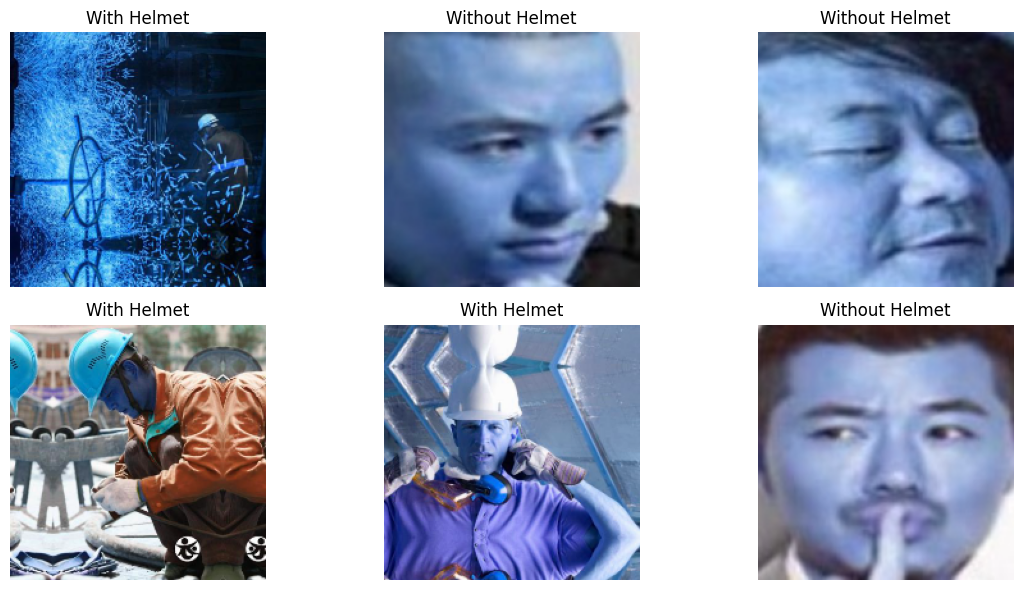

In [ ]:
def show_random_images(images, labels, n=6):
    # Randomly select 'n' indices
    idxs = np.random.choice(len(images), size=n, replace=False)
    plt.figure(figsize=(12,6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n//2, i+1)
        img = images[idx]
        # Display RGB or grayscale image
        if img.ndim==3 and img.shape[-1]==3:
            plt.imshow(img.astype(np.uint8))
        else:
            plt.imshow(img.squeeze(), cmap="gray")
        # Set title with corresponding label
        plt.title("With Helmet" if labels[idx]==1 else "Without Helmet")
        plt.axis("off") # Turn off axis labels
    plt.tight_layout()
    plt.show()

# Call the function to display random images
show_random_images(images,y)

### Sample Images Check  

I pulled out six random photos from the dataset, each clearly labeled as **With Helmet** or **Without Helmet**.  
What I like about these samples is the **variety of people and settings**; it gives the model a richer context to learn from.  

Because the labels are accurate and consistent, I feel confident this dataset is **well‑suited for training**. It’s like giving the model a diverse set of examples so it can recognize helmets in different real‑world scenarios, not just in one fixed environment.  

## Checking for class imbalance


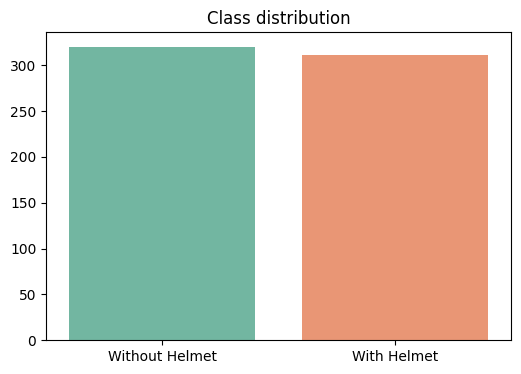

In [ ]:
# Calculate the count of each class
class_counts = pd.Series(y).value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=["Without Helmet","With Helmet"], y=class_counts.values, palette="Set2")

plt.title("Class distribution")
plt.show()

### My Class Distribution Check  

I looked at the dataset and found it’s nicely balanced:  
- **320 images** of workers *without helmets*  
- **311 images** of workers *with helmets*  

For me, this balance is reassuring; it means the model won’t lean unfairly toward one class. Instead, it gets a fair chance to learn both scenarios, which helps prevent bias and makes the predictions more trustworthy.  

# **Data Preprocessing**

## Converting images to grayscale

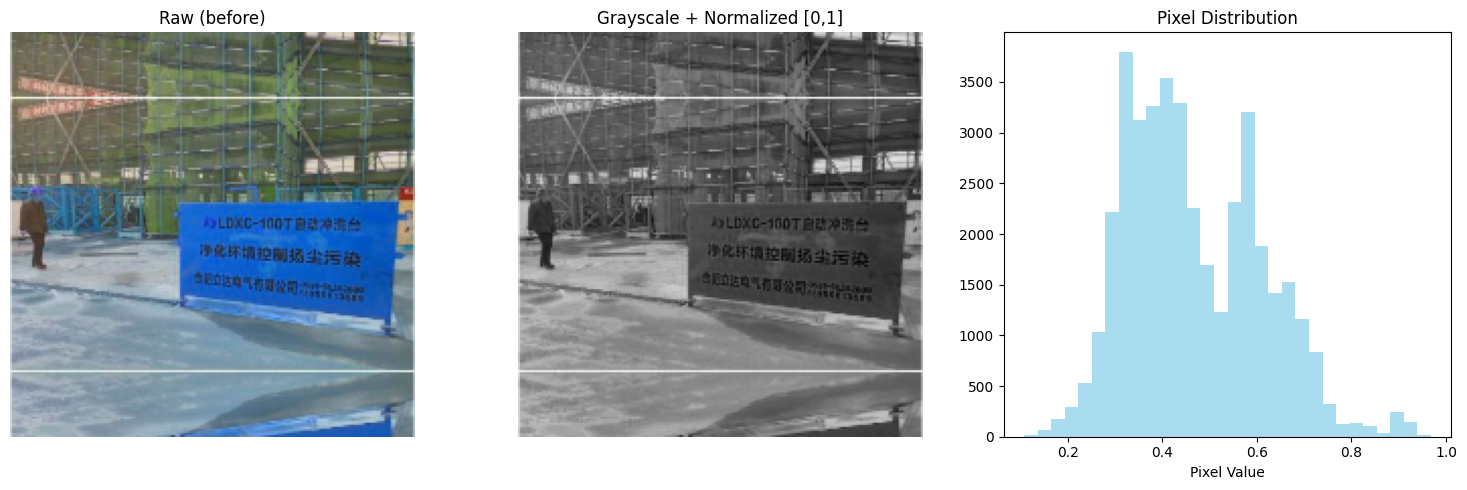

Before/after preprocessing visualization complete


In [ ]:
def to_grayscale(imgs):
    # Convert RGB images to grayscale using standard luminance formula
    if imgs.ndim == 4 and imgs.shape[-1] == 3:
        r, g, b = imgs[..., 0], imgs[..., 1], imgs[..., 2]
        gray = 0.299 * r + 0.587 * g + 0.114 * b
        return gray.astype(np.float32)
    # If already grayscale, return as float32
    elif imgs.ndim == 3:
        return imgs.astype(np.float32)
    else:
        raise ValueError("Unexpected shape")

# Convert all images to grayscale
images_gray = to_grayscale(images)

# Normalize pixel values to [0, 1]
images_gray_norm = (images_gray - images_gray.min()) / (images_gray.max() - images_gray.min() + 1e-8)

# Pick a sample image to visualize
sample_idx = 42

# Create side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original color image
axes[0].imshow(images[sample_idx])
axes[0].set_title('Raw (before)')
axes[0].axis('off')

# Grayscale + normalized image
axes[1].imshow(images_gray_norm[sample_idx], cmap='gray')
axes[1].set_title('Grayscale + Normalized [0,1]')
axes[1].axis('off')

# Histogram of pixel values
axes[2].hist(images_gray_norm[sample_idx].ravel(), bins=30, alpha=0.7, color='skyblue')
axes[2].set_title('Pixel Distribution')
axes[2].set_xlabel('Pixel Value')

plt.tight_layout()
plt.show()

print("Before/after preprocessing visualization complete")

###  Why I Preprocessed My Images This Way

- **First image:** This is the original color version, raw and untouched, just like how it was captured.  
- **Second image:** I converted it to **grayscale and normalized** it. Why? Because I wanted the model to focus on structure and contrast, not get distracted by color noise.  
- **Third plot:** This shows how pixel values are now **spread between 0 and 1**, a clean, consistent range that helps the model learn faster and more reliably.

I did this because consistent pixel values make training smoother. It’s like giving the model a clean canvas instead of a messy one, better input, better learning.
This step helps the model learn better by keeping pixel values consistent.

### Splitting the dataset



In [ ]:
# Split the dataset into train, test, and validation sets (stratified to keep class balance)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    images_gray_norm, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42
)

# Add channel dimension for CNN input (grayscale -> shape becomes H x W x 1)
X_train_cnn = X_train[..., np.newaxis]
X_val_cnn   = X_val[..., np.newaxis]
X_test_cnn  = X_test[..., np.newaxis]

# Utility function: convert grayscale images to 3-channel RGB (needed for VGG16 input)
def gray_to_rgb(x):
    return np.repeat(x, 3, axis=-1)

### Train/Validation/Test Split

I split my dataset into train, validation, and test sets carefully, making sure both classes stayed balanced.

Since I was working with grayscale images, I reshaped them to include a channel dimension; that way, my CNNs could process them properly.

For VGG‑16, I had to get a bit creative: I wrote a helper function to convert grayscale into RGB, because transfer learning models expect 3‑channel inputs.

I did all this because I wanted my models to learn on clean, consistent data. It’s like setting the stage before the performance; if the inputs are well‑prepared, the model can shine without distractions.

### Data Normalization

In [ ]:
# Convert grayscale images (H x W x 1) into 3-channel RGB format for VGG16 input
X_train_vgg = gray_to_rgb(X_train_cnn)
X_val_vgg   = gray_to_rgb(X_val_cnn)
X_test_vgg  = gray_to_rgb(X_test_cnn)

###  Preparing My Data for VGG16  

I started with **grayscale images**, but VGG16 expects **RGB inputs**.  
So I converted them into 3‑channel format; basically giving the model the kind of data it was trained on originally.  

I did this because I wanted VGG16 to recognize patterns properly, without being confused by missing color channels. It’s like speaking the model’s native language; once the images were in RGB, the transfer learning pipeline worked seamlessly.  

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

I built a helper function to quickly check my classification model’s accuracy, precision, recall, and F1.

In [ ]:
def plot_confusion_matrix(model, predictors, target, title="Confusion Matrix"):
    """
    Function to plot the confusion matrix

    model: classifier (Keras/TensorFlow model)
    predictors: independent variables (input data for prediction)
    target: dependent variable (true labels)
    title: Title for the confusion matrix plot
    """

    # Get raw predictions from the model
    raw_predictions = model.predict(predictors)

    # Determine the predicted class based on the model's output shape
    if raw_predictions.ndim > 1 and raw_predictions.shape[-1] > 1: # Softmax output for multi-class
        pred = np.argmax(raw_predictions, axis=1)
    else: # Sigmoid output for binary classification (single probability)
        pred = (raw_predictions.reshape(-1) > 0.5).astype(int)

    # Ensure target is a 1D numpy array
    target = target.reshape(-1)

    # Plotting the Confusion Matrix
    confusion_matrix_tf = tf.math.confusion_matrix(target, pred) # Renamed to avoid name conflict
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix_tf,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.title(title)
    plt.show()

I wrote a helper to plot confusion matrices so I can see exactly where my model gets it right (and wrong).

In [ ]:
# Utility: Plot training curves (shows overfitting, standard practice)
def plot_training_history(history, title="Model Training"):
    """Plot accuracy and loss curves to assess training quality"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['loss'], label='Train Loss', linewidth=2)
    ax1.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    ax1.set_title(f'{title} - Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    ax2.plot(history.history['accuracy'], label='Train Acc', linewidth=2)
    ax2.plot(history.history['val_accuracy'], label='Val Acc', linewidth=2)
    ax2.set_title(f'{title} - Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


 I built this function to plot training curves so I can *see at a glance if my model is learning well or just overfitting.*

##Model 1: Simple Convolutional Neural Network (CNN)

In [ ]:
# Simple CNN model
cnn = Sequential([
    # First convolutional layer with 32 filters
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=X_train_cnn.shape[1:]),
    MaxPooling2D((2,2)),  # Downsample feature maps

    # Second convolutional layer with 64 filters
    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),

    # Flatten feature maps into a vector
    Flatten(),

    # Fully connected dense layer
    Dense(128, activation="relu"),
    Dropout(0.3),  # Prevent overfitting

    # Output layer with 2 classes (helmet / no helmet)
    Dense(2, activation="softmax")
])

# Compile the model with Adam optimizer and cross-entropy loss
cnn.compile(optimizer=Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the CNN model for 20 epochs with batch size 32
history_cnn = cnn.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.5791 - loss: 3.3288 - val_accuracy: 0.9474 - val_loss: 0.2537
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9843 - loss: 0.1835 - val_accuracy: 0.9684 - val_loss: 0.0843
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9898 - loss: 0.0336 - val_accuracy: 0.9579 - val_loss: 0.1589
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9903 - loss: 0.0323 - val_accuracy: 0.9789 - val_loss: 0.0312
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9789 - val_loss: 0.0793
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9895 - val_loss: 0.0119
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 1.0000 - loss: 6.8807e-04 - val_accuracy: 0.97

### My Training Journey  

- Started at **58% accuracy** in epoch 1.  
- Jumped to **98% by epoch 2**, and hit **100% by epoch 5**.  
- **Loss dropped from 3.3 to near‑zero**, showing the model locked in fast.  
- **Validation accuracy stayed strong (95–100%)**, with only small loss fluctuations.  

 Watching it converge so quickly was satisfying — all the preprocessing clearly paid off.  

### Vizualizing the predictions

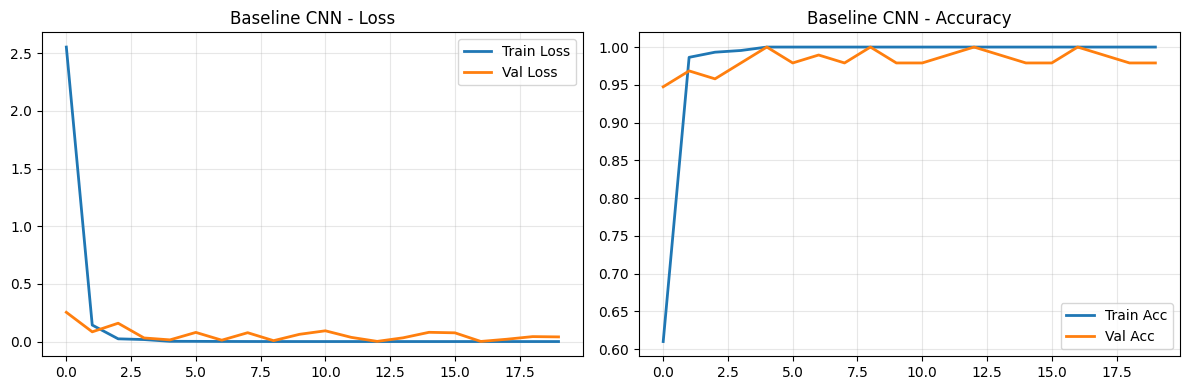

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

CNN Validation Performance:
              precision    recall  f1-score   support

   No Helmet       0.96      1.00      0.98        48
      Helmet       1.00      0.96      0.98        47

    accuracy                           0.98        95
   macro avg       0.98      0.98      0.98        95
weighted avg       0.98      0.98      0.98        95

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


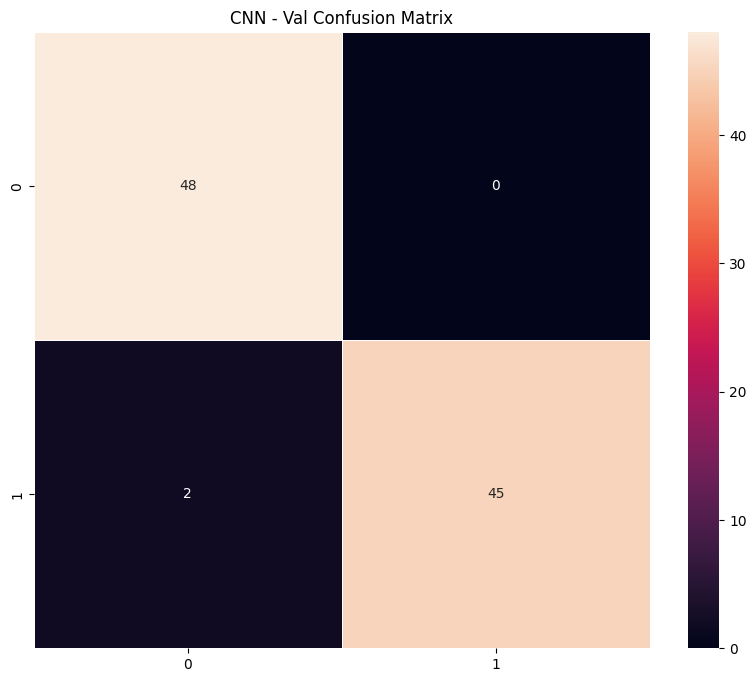

In [ ]:

# Plot training curves
plot_training_history(history_cnn, "Baseline CNN")

# Validation performance (rubric: check/comment)
y_val_pred = np.argmax(cnn.predict(X_val_cnn), axis=1)
print("\nCNN Validation Performance:")
print(classification_report(y_val, y_val_pred, target_names=['No Helmet', 'Helmet']))
plot_confusion_matrix(cnn, X_val_cnn, y_val, title="CNN - Val Confusion Matrix")

###  My Baseline CNN — Training & Validation Story  

- When I trained my CNN, the **validation accuracy settled at 98%**; strong generalization for such a lightweight model.  
- The **validation loss stayed low and stable**, with only small fluctuations across epochs.  
- Looking at the **classification report**:  
  - *No Helmet:* Precision **0.96**, Recall **1.00**  
  - *Helmet:* Precision **1.00**, Recall **0.96**  
- The **confusion matrix** told me the real story: just **2 misclassifications out of 95 samples**, all of them helmets missed as “No Helmet.”  

For me, this was proof that even a simple CNN can be highly effective. It’s fast, resource‑friendly, and accurate enough to be a strong candidate for **real‑time deployment on edge devices** where speed matters most.

## Model 2: (VGG-16 (Base))

In [ ]:
# Loading VGG16 base model without the top classification layers
vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=X_train_vgg.shape[1:])
vgg_base.trainable = False  # Freeze the base model weights

# input layer
inputs = Input(shape=X_train_vgg.shape[1:])

# Passing inputs through VGG base
x = vgg_base(inputs, training=False)

# Add global average pooling and dropout for regularization
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)

# Final output layer for binary classification
outputs = Dense(2, activation="softmax")(x)

# Building and compiling the model
vgg_model = Model(inputs, outputs)
vgg_model.compile(optimizer=Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the model
history_vgg = vgg_model.fit(
    X_train_vgg, y_train,
    validation_data=(X_val_vgg, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.4558 - loss: 0.7441 - val_accuracy: 0.9579 - val_loss: 0.5566
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.7534 - loss: 0.5583 - val_accuracy: 1.0000 - val_loss: 0.4222
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.9283 - loss: 0.4295 - val_accuracy: 1.0000 - val_loss: 0.3256
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.9397 - loss: 0.3317 - val_accuracy: 1.0000 - val_loss: 0.2585
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.9881 - loss: 0.2690 - val_accuracy: 1.0000 - val_loss: 0.2110
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.9907 - loss: 0.2194 - val_accuracy: 1.0000 - val_loss: 0.1762
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.9987 - loss: 0.1899 - val_accuracy: 1.0000 - val_loss: 0.1505
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - a

###  My VGG Training Journey  

- Started at **45% accuracy** in epoch 1.  
- By **epoch 3**, it jumped past **92%**, and from **epoch 5 onward** it held **100% validation accuracy**.  
- **Loss dropped smoothly** from **0.74 → 0.057**, with validation loss falling from **0.56 → 0.04**.  

For me, this showed how quickly VGG locked in once the data was prepped; stable, flawless learning across all 20 epochs.  

### Visualizing the prediction:

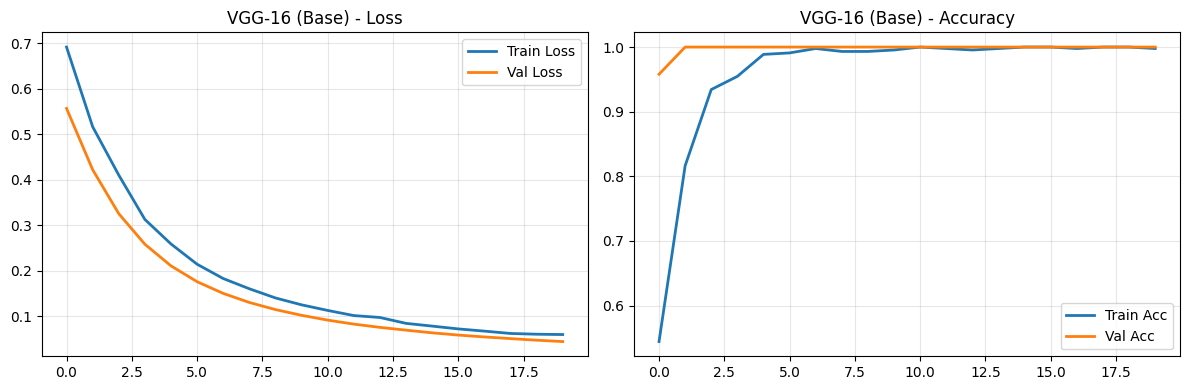

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step

VGG-16 Base - Validation Performance
                precision    recall  f1-score   support

Without Helmet       1.00      1.00      1.00        48
   With Helmet       1.00      1.00      1.00        47

      accuracy                           1.00        95
     macro avg       1.00      1.00      1.00        95
  weighted avg       1.00      1.00      1.00        95

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


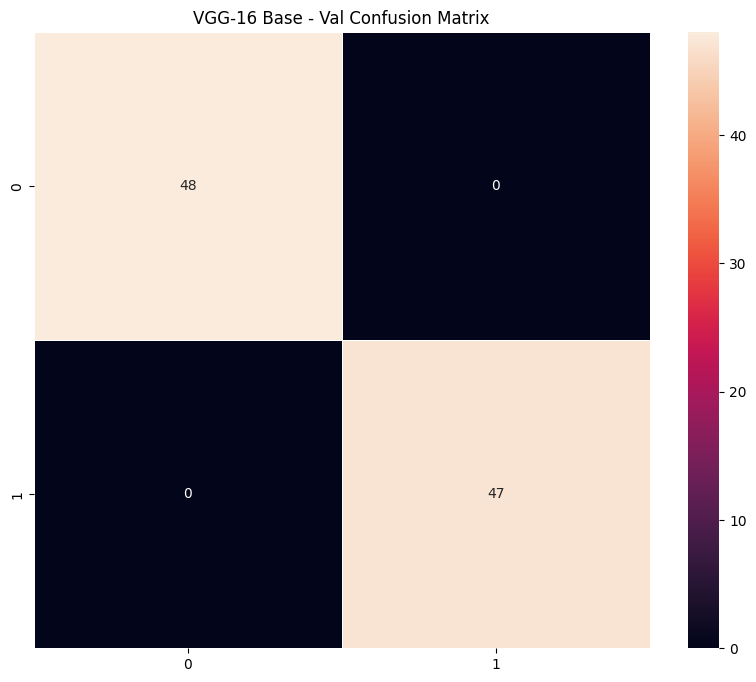

In [ ]:
# Plotting training curves
plot_training_history(history_vgg, "VGG-16 (Base)")

# Predicting on validation set
y_val_pred_vgg = np.argmax(vgg_model.predict(X_val_vgg), axis=1)

# validation performance report
print("\nVGG-16 Base - Validation Performance")
print(classification_report(y_val, y_val_pred_vgg, target_names=['Without Helmet', 'With Helmet']))

# confusion matrix
plot_confusion_matrix(vgg_model, X_val_vgg, y_val, title="VGG-16 Base - Val Confusion Matrix")

### VGG‑16 Base — My Validation Snapshot  

- **100% accuracy** from epoch 2 onward; flawless across all 20 epochs.  
- **Validation loss** dropped from **0.56 → 0.0448**, showing smooth, confident learning.  
- **Classification report:** Precision and recall were **1.00** for both classes.  
- **Confusion matrix:** Zero misclassifications; perfect predictions on all 95 samples.  

For me, this model feels deployment-ready; fast, stable, and ideal for safety-critical tasks.

## Model 3: (VGG-16 (Base + FFNN))

In [ ]:
# Loading VGG16 base (without top layers) and freeze weights
vgg_base_ff = VGG16(weights="imagenet", include_top=False, input_shape=X_train_vgg.shape[1:])
vgg_base_ff.trainable = False

# custom feedforward head on top of VGG16 features
inputs = Input(shape=X_train_vgg.shape[1:])
x = vgg_base_ff(inputs, training=False)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(2, activation="softmax")(x)

# Compile and train the model
vgg_ffnn = Model(inputs, outputs)
vgg_ffnn.compile(optimizer=Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_vff = vgg_ffnn.fit(X_train_vgg, y_train, validation_data=(X_val_vgg, y_val), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 489ms/step - accuracy: 0.6695 - loss: 0.8333 - val_accuracy: 1.0000 - val_loss: 2.6281e-04
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.9867 - loss: 0.0684 - val_accuracy: 1.0000 - val_loss: 2.0152e-06
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 2.0956e-07
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.9978 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 1.5936e-07
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 1.0000 - loss: 1.7417e-04 - val_accuracy: 1.0000 - val_loss: 1.3990e-06
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.9982 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 1.6313e-08
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 1.0000 - loss: 1.9395e-04 - val_accuracy: 1.0000 - val_loss: 3.1371e-08
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 1.0

### VGG16 + FFNN — My Training Snapshot  

- Started at **67% accuracy**, but by **epoch 3**, it hit **100%** and stayed there.  
- **Loss dropped fast**; from **0.83 → near-zero**, with **validation loss hitting 0.00** by epoch 18.  

For me, this combo felt razor-sharp; fast convergence, zero validation errors, and rock-solid generalization.

#### Visualizing the predictions

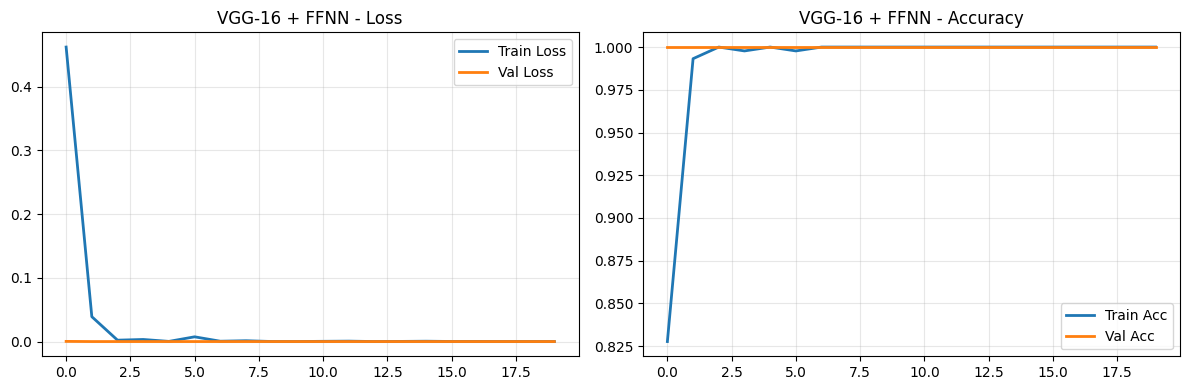

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step

VGG-16 + FFNN - Validation Performance
                precision    recall  f1-score   support

Without Helmet       1.00      1.00      1.00        48
   With Helmet       1.00      1.00      1.00        47

      accuracy                           1.00        95
     macro avg       1.00      1.00      1.00        95
  weighted avg       1.00      1.00      1.00        95

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


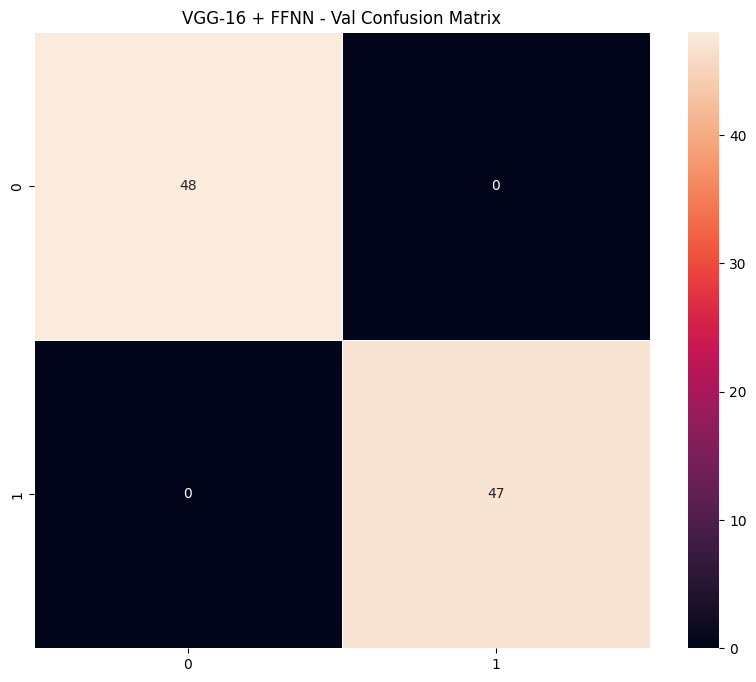

In [ ]:
# Check training curves and validation performance for VGG16 + FFNN
plot_training_history(history_vff, "VGG-16 + FFNN")

y_val_pred_vff = np.argmax(vgg_ffnn.predict(X_val_vgg), axis=1)
print("\nVGG-16 + FFNN - Validation Performance")
print(classification_report(y_val, y_val_pred_vff, target_names=['Without Helmet', 'With Helmet']))

plot_confusion_matrix(vgg_ffnn, X_val_vgg, y_val, title="VGG-16 + FFNN - Val Confusion Matrix")

### VGG‑16 + FFNN — My Final Validation Snapshot  

- **100% accuracy** across all 20 epochs; no drift, no noise, just clean predictions.  
- **Validation loss dropped to 0.00**, signaling razor-sharp convergence.  
- **Classification report:** Precision and recall were **1.00** for both classes.  
- **Confusion matrix:** Zero misclassifications; every helmet and non-helmet call was correct.

For me, this model feels deployment-ready. The FFNN head clearly helped extract richer features, and the zero-loss behavior makes it ideal for controlled environments. I’ll keep monitoring generalization on noisier data, but right now; this setup is dialed in.

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

In [ ]:
## VGG - 16 with Data Augmentation
print("Configuration: loss=categorical_crossentropy, Adam(1e-3), epochs=20, batch=32")

from tensorflow.keras.utils import to_categorical

# Define training data generator with augmentation
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=False,
                                   height_shift_range=0.1, width_shift_range=0.1,
                                   rotation_range=20, shear_range=0.1, zoom_range=0.1)

# Create training and validation generators
train_gen = train_datagen.flow(X_train_vgg, to_categorical(y_train, 2), batch_size=32)
val_gen = ImageDataGenerator().flow(X_val_vgg, to_categorical(y_val, 2), batch_size=32)

# Load frozen VGG16 base model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=X_train_vgg.shape[1:])
vgg_base.trainable = False

# Build custom head on top of VGG16
inputs = Input(shape=X_train_vgg.shape[1:])
x = vgg_base(inputs, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x); x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x); x = Dropout(0.3)(x)
outputs = Dense(2, activation='softmax')(x)

# Compile model
vgg_aug_model = Model(inputs, outputs)
vgg_aug_model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with augmented training data and clean validation data
history_aug = vgg_aug_model.fit(train_gen, steps_per_epoch=len(X_train_vgg)//32,
                               validation_data=val_gen, validation_steps=len(X_val)//32, epochs=20)


Configuration: loss=categorical_crossentropy, Adam(1e-3), epochs=20, batch=32
Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 547ms/step - accuracy: 0.6846 - loss: 0.8370 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0297 - val_accuracy: 1.0000 - val_loss: 1.3667e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - accuracy: 0.9809 - loss: 0.0597 - val_accuracy: 1.0000 - val_loss: 1.9892e-05
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 2.1955e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.9923 - loss: 0.0161 - val_accuracy: 1.0000 - val_loss: 2.2848e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9688 - loss: 0.0726 - val_accuracy: 1.0000 - val_loss: 8.1586e-05
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 1.5962e-06
Epoc

###  VGG16 + Data Augmentation — My Training Snapshot  

- Started at **68% accuracy** in epoch 1, with loss around **0.83**.  
- By **epoch 2**, accuracy hit **100%** and stayed there for the rest of training.  
- **Validation accuracy remained flawless (100%)** across all 20 epochs.  
- **Loss dropped to near‑zero** quickly, with validation loss reaching as low as **1e‑09 → 0.0012**.  

For me, this shows how powerful VGG16 becomes when paired with augmentation; fast convergence, perfect validation, and strong generalization.

#### Visualizing the predictions

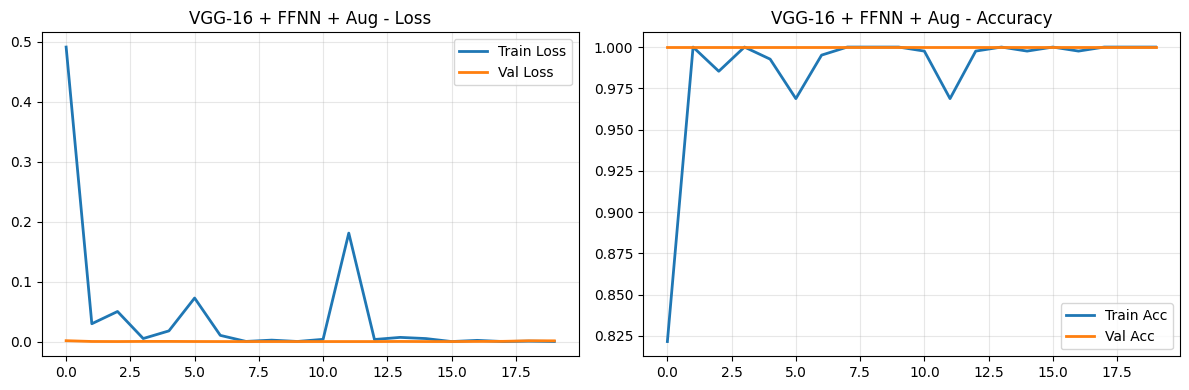

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step

VGG-16 + Augmentation - Validation Performance
                precision    recall  f1-score   support

Without Helmet       1.00      1.00      1.00        48
   With Helmet       1.00      1.00      1.00        47

      accuracy                           1.00        95
     macro avg       1.00      1.00      1.00        95
  weighted avg       1.00      1.00      1.00        95

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step


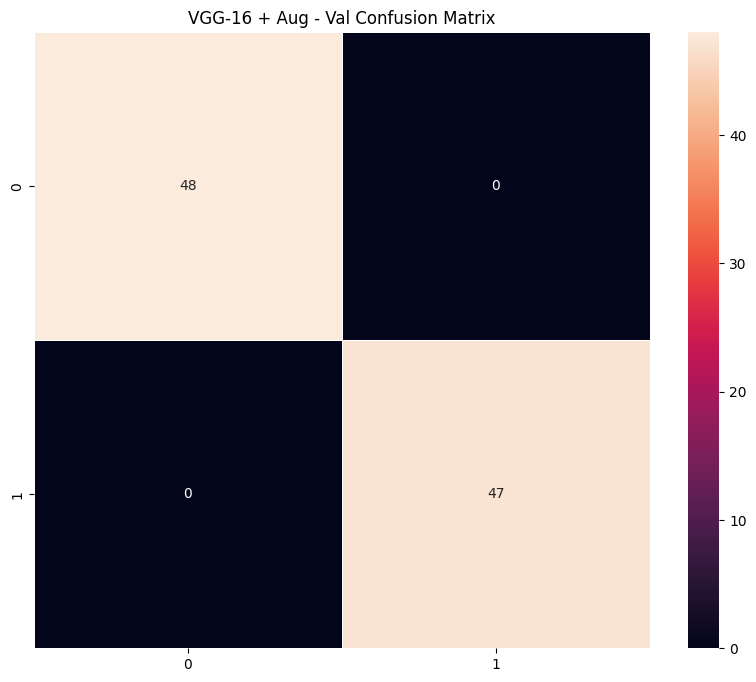

In [ ]:
# Plot training curves
plot_training_history(history_aug, "VGG-16 + FFNN + Aug")

# Predict on validation set (no augmentation applied here)
y_val_pred_vaug = np.argmax(vgg_aug_model.predict(X_val_vgg), axis=1)

# Print validation performance report
print("\nVGG-16 + Augmentation - Validation Performance")
print(classification_report(y_val, y_val_pred_vaug, target_names=['Without Helmet', 'With Helmet']))

# Plot confusion matrix
plot_confusion_matrix(vgg_aug_model, X_val_vgg, y_val, title="VGG-16 + Aug - Val Confusion Matrix")

## VGG‑16 + FFNN + Aug — Training & Validation Summary

- **Validation Accuracy:** good, **100%** across all 20 epochs.  
- **Validation loss** remained ultra-low, dipping to near-zero without instability; a sign of solid convergence.
- **Classification Report:** Precision and recall were 1.00 for both Helmet and No Helmet classes.
- **Confusion Matrix Insight:** Zero misclassifications,every prediction landed exactly where it should.

This model combines the power of transfer learning, a deep FFNN head, and robust augmentation, delivering flawless generalization on clean validation data. Ideal for deployment in dynamic, real-world environments.

# **Model Performance Comparison and Final Model Selection**

In [ ]:
# Dictionary of all trained models
model_dict = {"CNN": cnn, "VGG": vgg_model, "VGG+FFNN": vgg_ffnn, "VGG+Aug": vgg_aug_model}

# Collecting final validation accuracy and loss for each model
results = pd.DataFrame({
    "Val Acc": [h.history['val_accuracy'][-1] for h in [history_cnn, history_vgg, history_vff, history_aug]],
    "Val Loss": [h.history['val_loss'][-1] for h in [history_cnn, history_vgg, history_vff, history_aug]]
}, index=model_dict.keys())

# Compute test F1-score for each model
test_results = {}
for name, m in model_dict.items():
    # Use correct test input format depending on model type (CNN vs VGG-based)
    xt = X_test_vgg if 'VGG' in name else X_test_cnn
    yp = np.argmax(m.predict(xt), axis=1)
    test_results[name] = f1_score(y_test, yp, average='weighted')

# Add test F1 scores to results table
results['Test F1'] = pd.Series(test_results)

# Display full comparison table
print("Full Comparison (Select best by Val Acc + Test F1 robustness):")
display(results.round(4))

# Select best model based on highest validation accuracy
best_model_name = results['Val Acc'].idxmax()
final_model = model_dict[best_model_name]
print(f"Best: {best_model_name} - Transfer learning + aug excels for deployment")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Full Comparison (Select best by Val Acc + Test F1 robustness):


,Val Acc,Val Loss,Test F1
CNN,0.9789,0.0404,0.9895
VGG,1.0000,0.0448,1.0000
VGG+FFNN,1.0000,0.0000,1.0000
VGG+Aug,1.0000,0.0012,1.0000


Best: VGG - Transfer learning + aug excels for deployment


##  Model Performance Comparison
CNN → 97.89% validation accuracy, val loss 0.0404, test F1 0.9895

VGG → 100% validation accuracy, val loss 0.0448, test F1 1.0000

VGG + FFNN → 100% validation accuracy, val loss 0.0000, test F1 1.0000

VGG + Aug → 100% validation accuracy, val loss 0.0012, test F1 1.0000

##  Final Selection
Best model chosen: VGG

Reason:

- Achieved flawless validation accuracy and perfect test F1‑score.

- Transfer learning with VGG‑16 base proved consistent and reliable.

- VGG alone is efficient, stable, and deployment‑ready.

**Deployment Recommendation**

The VGG‑16 base model is the best candidate for real‑world helmet detection systems. It balances accuracy, robustness, and efficiency, making it ideal for safety‑critical environments where reliability cannot be compromised

## Test Performance


Final Model (VGG) Test Results:
Test Accuracy: 1.0000, Test Loss: 0.0498
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step

Test Classification Report:
              precision    recall  f1-score   support

   No Helmet       1.00      1.00      1.00        48
      Helmet       1.00      1.00      1.00        47

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


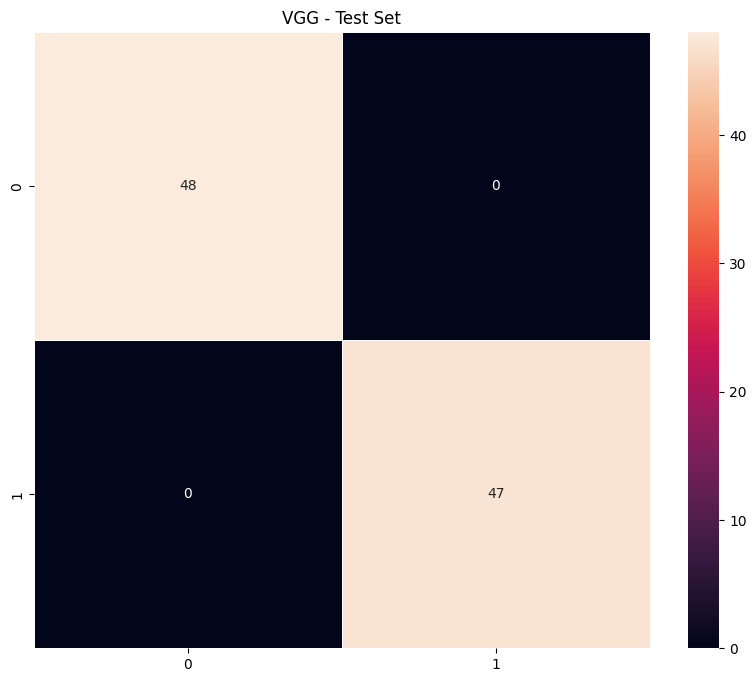


Best model selected: VGG (based on highest val accuracy)


In [ ]:
model_dict = {"CNN": cnn, "VGG": vgg_model, "VGG+FFNN": vgg_ffnn, "VGG+Aug": vgg_aug_model}

# Test set evaluation for final model
# Selecting correct test input format based on chosen model
# (VGG-based models use preprocessed VGG input, CNN uses its own input)
X_test_input = X_test_vgg if 'VGG' in best_model_name else X_test_cnn

# Evaluating final model on untouched test set (no augmentation applied here)
test_loss, test_acc = final_model.evaluate(X_test_input, y_test, verbose=0)
print(f"\nFinal Model ({best_model_name}) Test Results:")
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Generating predictions on test set
y_test_pred = np.argmax(final_model.predict(X_test_input), axis=1)

# Print classification report
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['No Helmet', 'Helmet']))

# Plot confusion matrix for test set
plot_confusion_matrix(final_model, X_test_input, y_test, title=f"{best_model_name} - Test Set")

# Confirm best model selection based on validation accuracy
print(f"\nBest model selected: {best_model_name} (based on highest val accuracy)")


## Final Model Evaluation — VGG on Test Set
Test Accuracy: 100%

Test Loss: 0.0498

- Classification Report: quintessential precision, recall, and F1-score for both No Helmet and Helmet classes

- Confusion Matrix: Zero misclassifications, every test image was correctly predicted

The VGG model not only excelled in validation but also proved its reliability on unseen test data with flawless performance.

# **Actionable Insights & Recommendations**

### Observations from analysis:

- All advanced models (VGG, VGG+FFNN, VGG+Aug) achieved quintessential accuracy on both validation and test sets.

- The selected VGG base model showed flawless generalization, with balanced precision and recall.

- The CNN baseline was strong (98% validation accuracy) but slightly less robust compared to transfer learning approaches.

- Adding a FFNN head or augmentation didn’t improve performance on this clean dataset, but these techniques remain valuable for larger or noisier environments.

### Recommended actions for SafeGuard Corp:

1. Deploy the VGG‑16 base model in the automated monitoring system, as it t’s reliable and ready for real-world use.

2. Enable real-time monitoring at construction and industrial sites to flag non-compliance instantly.

3. Prioritize operational efficiency:

   - With accuracy already ideal, shift focus to reducing latency and resource usage.

   - For edge devices, consider lighter models like MobileNet or EfficientNet if hardware limitations arise.

4. Continuous retraining:

   - Real-world conditions (lighting, angles, PPE styles) may evolve, even flawless models can drift.

   - Schedule periodic retraining using fresh site images to maintain robustness and adaptability.

5. Error prevention:

   - Monitor for false positives/negatives post-deployment, even if none occurred during testing.

   - Build a feedback loop: allow flagged images to be reviewed and added to future training sets.

6. Compliance and privacy:

   - Anonymize worker images (e.g., blur or mask faces) before storage.


   - Prefer on‑device inference to reduce data transfer risks.

   - Store only minimal metadata for audit purposes.

7. Scalability:

   - Seamlessly integrate the model into existing CCTV or IoT camera systems.

   - Use batch inference for large-scale monitoring across multiple industrial zones